# Notebook: generate samples and construct persistence diagrams

In [ ]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

## MNIST

In [2]:
from keras.datasets import mnist

In [ ]:
# Load MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
# Select train data for labels 4 and 8
train_X4 = train_X[train_y == 4]
train_X8 = train_X[train_y == 8]

In [ ]:
# construct and save persistence diagrams
MNIST_DGM_PATH = '/data/MNIST/diagrams/'
for i in range(train_X4.shape[0]):
    img = train_X4[i]
    dgms = ripser(img)['dgms']
    np.save(MNIST_DGM_PATH + 'label4-' + str(i) + '.npy', dgms[1])
for i in range(train_X8.shape[0]):
    img = train_X8[i]
    dgms = ripser(img)['dgms']
    np.save(MNIST_DGM_PATH + 'label8-' + str(i) + '.npy', dgms[1])

## ORBIT5K

In [ ]:
from orbit_util import *

In [ ]:
param_list = [2.5, 3.5, 4.0, 4.1, 4.3]
num_orbit_per_param = 1000
num_pts_per_orbit = 1000

In [ ]:
# generate orbits and labels
X,y = generate_orbits(param_list, num_orbit_per_param, num_pts_per_orbit)
# save data
np.savez('../data/ORBIT5K/data.npz',X = X, y = y)

In [ ]:
# generate and save persistence diagrams


## Power sphere distribution

In [4]:
from power_sphere_util import *

In [5]:
NUM_SAMPLES = 1000
NUM_PTS_PER_SAMPLE = 1000
DIMENSION = 2
SIGMA = 0.05
KAPPA = 1

In [10]:
# generate samples
unif_x = generate_uniform_sphere(NUM_SAMPLES, NUM_PTS_PER_SAMPLE,DIMENSION,SIGMA)
power_x = generate_power_sphere(NUM_SAMPLES, NUM_PTS_PER_SAMPLE,DIMENSION,KAPPA,SIGMA)

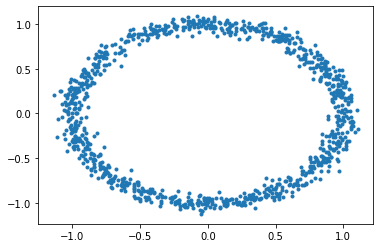

In [9]:
# plot one sample for unit sphere distribution
plt.plot(unif_x[0,:,0],unif_x[0,:,1], '.')

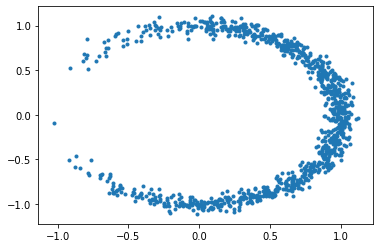

In [11]:
# plot one sample for power sphere distribution
plt.plot(power_x[0,:,0],power_x[0,:,1], '.')

In [ ]:
# construct and save persistence diagrams
SPHERE_DGM_PATH = 'data/sphere/diagrams/'
for i in range(NUM_SAMPLES):
    dgms = ripser(unif_x[i])['dgms']
    np.save(SPHERE_DGM_PATH + 'unif' + str(i) + '.npy', dgms[1])
    dgms = ripser(power_x[i])['dgms']
    np.save(SPHERE_DGM_PATH + 'power' + str(i) + '.npy', dgms[1])